In [1]:
import numpy as np
import pandas as pd

In [2]:
# 1 Read Batting.csv

In [3]:
df = pd.read_csv('Batting.csv')

In [4]:
#2 Print out the dimensions and info about the dataframe 

In [5]:
df.info()
#test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102816 entries, 0 to 102815
Data columns (total 25 columns):
playerID     102816 non-null object
nameFirst    102816 non-null object
nameLast     102816 non-null object
birthYear    102816 non-null int64
yearID       102816 non-null int64
stint        102816 non-null int64
teamID       102816 non-null object
lgID         102079 non-null object
G            102816 non-null int64
AB           102816 non-null int64
R            102816 non-null int64
H            102816 non-null int64
2B           102816 non-null int64
3B           102816 non-null int64
HR           102816 non-null int64
RBI          102392 non-null float64
SB           101516 non-null float64
CS           79360 non-null float64
BB           102816 non-null int64
SO           94978 non-null float64
IBB          66251 non-null float64
HBP          100006 non-null float64
SH           96478 non-null float64
SF           66782 non-null float64
GIDP         76706 non-null float

In [6]:
df.describe()

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
count,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102816.000000,102392.000000,101516.000000,79360.000000,102816.000000,94978.000000,66251.000000,100006.000000,96478.000000,66782.000000,76706.000000
mean,1932.991869,1964.262313,1.077838,51.343439,141.905511,18.815544,37.139930,6.289167,1.293252,2.813599,17.003975,2.976821,1.226008,13.067207,20.529712,1.105870,1.056057,2.299540,1.054101,2.981018
std,87.105524,38.856297,0.284366,47.121658,184.654492,28.242983,52.603757,9.662468,2.645770,6.304919,26.352011,7.717174,2.747377,20.746460,28.328542,2.780187,2.276251,4.241095,1.961732,4.735153
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1945.000000,1973.000000,1.000000,34.000000,49.000000,4.000000,9.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1969.000000,1998.000000,1.000000,80.000000,231.000000,27.000000,58.000000,9.000000,1.000000,2.000000,24.000000,2.000000,1.000000,18.000000,29.000000,1.000000,1.000000,3.000000,1.000000,4.000000
max,1996.000000,2016.000000,5.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,191.000000,138.000000,42.000000,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000


In [ ]:
#Helper functions for calculating baseball statistics 

In [7]:
#Batting Average is number of hits divided by at bats
def BattingAverage(h, ab):
    if(ab != 0):
        return h / ab
    else:
        return 0
        

In [8]:
#age = Current year - birthyear
def age(currentYear, birthYear):
    if(currentYear != 0 and birthYear != 0):
        return (currentYear - birthYear)
    else:
        return 0

In [9]:
#OBP = (hits + walks + hit by pitch) / (at bats + walks + hit by pitch + sacrifice flies)
def OBS(hits, walks, hbp, ab, sf):
    if((ab + walks + hbp + sf) != 0):
        return (hits + walks + hbp) / (ab + walks + hbp + sf)
    else:
        return 0

In [10]:
#PA = AB + BB + HBP + SH + SF + (Times Reached on Defensive Interference IGNORE THIS)
def PA(AB, BB, HBP, SH, SF):
    return AB + BB + HBP + SH + SF

In [73]:
playerCareerTotals = df.groupby(["playerID","nameFirst","nameLast"], as_index=False).sum()
type(playerCareerTotals)

pandas.core.frame.DataFrame

In [74]:
playerCareerTotals.describe()

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
count,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,...,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000,18915.000000
mean,10507.136770,10677.113085,5.858789,279.086809,771.353793,102.275390,201.880994,34.185937,7.029712,15.293841,...,71.029236,103.085964,3.873381,5.583505,11.729051,3.721649,12.088924,0.712625,0.965085,511.712979
std,9820.645025,9959.489812,5.621206,453.824217,1603.985998,238.578514,450.549938,79.835905,18.905794,50.240622,...,175.079949,226.909601,16.743993,15.570065,28.469311,12.085521,33.423978,1.344112,1.242955,1488.551228
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1987.000000,2015.000000,1.000000,13.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000
50%,5961.000000,6042.000000,4.000000,78.000000,71.000000,6.000000,12.000000,2.000000,0.000000,0.000000,...,4.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.456767,0.000000
75%,15728.000000,15959.500000,9.000000,329.000000,603.000000,63.000000,133.000000,21.000000,4.000000,4.000000,...,40.000000,89.000000,0.000000,3.000000,10.000000,0.000000,4.000000,0.830890,1.360448,120.000000
max,57753.000000,58823.000000,39.000000,3562.000000,14053.000000,2295.000000,4256.000000,792.000000,309.000000,762.000000,...,2558.000000,2597.000000,688.000000,287.000000,512.000000,128.000000,350.000000,11.476689,9.102140,15861.000000


In [75]:
listColumns = list(df.columns) 
listColumns = [e for e in listColumns if e not in ('birthYear','yearID')]
print(listColumns)
sst = df.groupby(["playerID","nameFirst","nameLast","birthYear","yearID"], as_index=False)[listColumns].sum()

['playerID', 'nameFirst', 'nameLast', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R', 'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP', 'SH', 'SF', 'GIDP', 'OBP', 'BA', 'PA']


In [76]:
sst.describe()

,birthYear,yearID,stint,G,AB,R,H,2B,3B,HR,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
count,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,...,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000,95250.000000
mean,1932.972577,1964.192871,1.163454,55.421806,153.177501,20.310121,40.090068,6.788735,1.395979,3.037092,...,14.105176,20.471087,0.769186,1.108787,2.329186,0.739055,2.400651,0.141515,0.191649,101.617333
std,88.053670,38.751849,0.612216,48.160582,190.781776,29.206727,54.368902,10.002820,2.746006,6.560156,...,21.513211,28.880389,2.385772,2.350938,4.302277,1.729382,4.475267,0.183013,0.150588,187.081769
min,0.000000,1871.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1905.000000,1934.000000,1.000000,15.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.000000
50%,1946.000000,1973.000000,1.000000,38.000000,56.000000,5.000000,10.000000,1.000000,0.000000,0.000000,...,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.217486,1.000000
75%,1969.000000,1998.000000,1.000000,91.000000,266.000000,32.000000,67.000000,11.000000,2.000000,3.000000,...,21.000000,29.000000,0.000000,1.000000,3.000000,0.000000,3.000000,0.299663,0.274038,91.000000
max,1996.000000,2016.000000,15.000000,165.000000,716.000000,192.000000,262.000000,67.000000,36.000000,73.000000,...,232.000000,223.000000,120.000000,51.000000,67.000000,19.000000,36.000000,2.250000,2.250000,778.000000


In [15]:
#Sanity Check to make sure row totals logically make sense
Count_Row1=df.shape[0]
Count_Row2=playerCareerTotals.shape[0]
Count_Row3=sst.shape[0]
print(Count_Row1)
print(Count_Row2)
print(Count_Row3)

102816
18915
95250


In [16]:
#3) How many players have hit 40 or more HRs in one single season? (Number Only)

In [79]:
sst[sst['HR'] >= 40]['HR'].count()

330

In [80]:
#4) How many players have hit more than 600 HRs for their career? (Dataframe)

In [81]:
playerCareerTotals[playerCareerTotals['HR'] >= 600]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
1,aaronha01,Hank,Aaron,44482,45195,23,3298,12364,2174,3771,...,1402,1383.0,293.0,32.0,21.0,121.0,328.0,8.552352,6.924731,13940.0
1542,bondsba01,Barry,Bonds,43208,43923,22,2986,9847,2227,2935,...,2558,1539.0,688.0,106.0,4.0,91.0,165.0,9.713989,6.562727,12606.0
6633,griffke02,Ken,Griffey,45287,45997,24,2671,9801,1662,2781,...,1312,1779.0,246.0,81.0,8.0,102.0,199.0,8.331551,6.319576,11304.0
10857,mayswi01,Willie,Mays,44413,45145,24,2992,10881,2062,3283,...,1464,1526.0,192.0,44.0,13.0,91.0,251.0,8.055035,6.667193,11825.0
14528,rodrial01,Alex,Rodriguez,43450,44101,22,2784,10566,2021,3115,...,1338,2287.0,97.0,176.0,16.0,111.0,261.0,8.005160,6.232222,12207.0
14865,ruthba01,Babe,Ruth,41690,42339,22,2503,8398,2174,2873,...,2062,1330.0,0.0,43.0,113.0,0.0,2.0,0.000000,7.100518,0.0
16103,sosasa01,Sammy,Sosa,37392,37945,20,2354,8813,1475,2408,...,929,2306.0,154.0,59.0,17.0,78.0,202.0,6.321756,5.094862,9896.0
17004,thomeji01,Jim,Thome,49250,50065,28,2543,8422,1583,2328,...,1747,2548.0,173.0,69.0,1.0,74.0,165.0,9.502432,6.700664,10313.0


In [18]:
#5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)

In [19]:
sst[(sst['2B'] >= 40) & (sst['3B'] >= 10) & (sst['H'] >= 200) & (sst['HR'] >= 30)]['G'].count()

16

In [20]:
#6) How many players have had 100 or more SBs in a season? (Dataframe)

In [82]:
sst[sst['SB'] >= 100]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
9713,brocklo01,Lou,Brock,1939,1974,1,153,635,105,194,...,61,88.0,16.0,2.0,2.0,1.0,8.0,0.367668,0.305512,701.0
10331,brownpe01,Pete,Browning,1861,1887,1,134,547,137,220,...,55,0.0,0.0,8.0,0.0,0.0,0.0,0.000000,0.402194,0.0
10364,brownto01,Tom,Brown,1860,1891,1,137,589,177,189,...,70,96.0,0.0,4.0,0.0,0.0,0.0,0.000000,0.320883,0.0
16351,colemvi01,Vince,Coleman,1961,1985,1,151,636,107,170,...,50,115.0,1.0,0.0,5.0,1.0,3.0,0.320233,0.267296,692.0
16352,colemvi01,Vince,Coleman,1961,1986,1,154,600,94,139,...,60,98.0,0.0,2.0,3.0,5.0,4.0,0.301349,0.231667,670.0
16353,colemvi01,Vince,Coleman,1961,1987,1,151,623,121,180,...,70,126.0,0.0,3.0,5.0,1.0,7.0,0.362984,0.288925,702.0
16703,comisch01,Charlie,Comiskey,1859,1887,1,125,538,139,180,...,27,0.0,0.0,7.0,0.0,0.0,0.0,0.000000,0.334572,0.0
27187,fogarji01,Jim,Fogarty,1864,1887,1,126,495,113,129,...,82,44.0,0.0,10.0,0.0,0.0,0.0,0.000000,0.260606,0.0
34649,hamilbi01,Billy,Hamilton,1866,1889,1,137,534,144,161,...,87,41.0,0.0,14.0,0.0,0.0,0.0,0.000000,0.301498,0.0
34650,hamilbi01,Billy,Hamilton,1866,1890,1,123,496,133,161,...,83,37.0,0.0,9.0,0.0,0.0,0.0,0.000000,0.324597,0.0


In [22]:
#7) How many players in the 1960s have hit more than 200 HRs? (Dataframe)

In [83]:
stats1960s = sst[(sst['yearID'] >= 1960) & (sst['yearID'] <= 1969)];
total1960s = stats1960s.groupby(["playerID","nameFirst","nameLast"], as_index=False).sum()
total1960s[total1960s['HR'] >= 200]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
0,aaronha01,Hank,Aaron,19340,19645,10,1540,5912,1091,1819,...,672,723.0,160.0,12.0,1.0,64.0,146.0,3.759823,3.077236,6661.0
19,allisbo01,Bob,Allison,19340,19645,10,1333,4355,712,1110,...,719,916.0,29.0,31.0,20.0,33.0,90.0,3.582196,2.505957,5158.0
70,bankser01,Ernie,Banks,19310,19645,10,1495,5554,694,1460,...,410,756.0,127.0,46.0,31.0,61.0,145.0,3.147647,2.620844,6102.0
279,cashno01,Norm,Cash,19340,19645,10,1442,4819,779,1326,...,778,770.0,74.0,58.0,10.0,39.0,102.0,3.777762,2.744244,5704.0
283,cepedor01,Orlando,Cepeda,19370,19645,12,1400,5158,773,1522,...,391,767.0,105.0,81.0,2.0,50.0,133.0,3.748209,3.129338,5682.0
323,colavro01,Rocky,Colavito,17397,17676,13,1304,4634,677,1222,...,676,577.0,44.0,22.0,8.0,44.0,137.0,3.792233,2.767220,5384.0
751,howarfr01,Frank,Howard,19360,19645,10,1370,4776,654,1315,...,500,1103.0,74.0,28.0,7.0,31.0,138.0,3.431109,2.752360,5342.0
830,kalinal01,Al,Kaline,19340,19645,10,1322,4730,811,1399,...,652,489.0,65.0,25.0,20.0,46.0,122.0,3.809484,2.947476,5473.0
856,killeha01,Harmon,Killebrew,19360,19645,10,1429,4994,864,1331,...,970,1029.0,98.0,35.0,0.0,43.0,133.0,3.844874,2.640849,6042.0
1009,mantlmi01,Mickey,Mantle,17379,17676,9,1155,3624,683,1023,...,841,811.0,72.0,4.0,2.0,29.0,69.0,3.741617,2.555769,4500.0


In [84]:
#8) Who has hit the most HRs in history? (Dataframe)

In [88]:
#playerCareerTotals.loc[playerCareerTotals['HR'].idxmax()]
playerCareerTotals.sort_values('HR', ascending=[False]).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
1542,bondsba01,Barry,Bonds,43208,43923,22,2986,9847,2227,2935,...,2558,1539.0,688.0,106.0,4.0,91.0,165.0,9.713989,6.562727,12606.0


In [26]:
#9) Who had the most hits in the 1970s? (Dataframe)

In [91]:
stats1970s = sst[(sst['yearID'] >= 1970) & (sst['yearID'] <= 1979)];
total1970s = stats1970s.groupby(["playerID","nameFirst","nameLast"], as_index=False).sum()
#total1970s[total1970s['HR'] >= 200]['HR'].count()
# get the row of max value
#total1970s.loc[total1970s['H'].idxmax()]
total1970s.sort_values('H', ascending=[False]).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
1639,rosepe01,Pete,Rose,19410,19745,10,1604,6523,1068,2045,...,783,464.0,87.0,50.0,9.0,34.0,111.0,3.892296,3.134102,7399.0


In [28]:
#10) Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)
#OBP = (hits + walks + hit by pitch) / (at bats + walks + hit by pitch + sacrifice flies)

In [92]:
sst['OBP'] = sst.apply(lambda row: OBS(row.H, row.BB, row.HBP, row.AB, row.SF), axis=1)
sst['PA'] = sst.apply(lambda row: PA(row.AB, row.BB, row.HBP, row.SH, row.SF), axis=1)
sst1977 = sst[(sst['yearID'] == 1977) & (sst['PA'] >= 500)]
sst1977.sort_values(by='OBP', ascending = False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
12979,carewro01,Rod,Carew,1945,1977,1,155,616,128,239,...,69,55.0,15.0,3.0,1.0,5.0,6.0,0.448773,0.387987,694.0
79255,singlke01,Ken,Singleton,1947,1977,1,152,536,90,176,...,107,101.0,13.0,2.0,0.0,6.0,15.0,0.437788,0.328358,651.0
80255,smithre06,Reggie,Smith,1945,1977,1,148,488,104,150,...,104,76.0,11.0,3.0,1.0,7.0,5.0,0.426910,0.307377,603.0
35331,hargrmi01,Mike,Hargrove,1949,1977,1,153,525,98,160,...,103,59.0,7.0,6.0,8.0,6.0,13.0,0.420312,0.304762,648.0
59797,morgajo02,Joe,Morgan,1943,1977,1,153,521,113,150,...,117,58.0,2.0,2.0,0.0,5.0,5.0,0.417054,0.287908,645.0


In [30]:
#11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [31]:
sst['BA'] = sst.apply(lambda row: BattingAverage(row.H, row.AB), axis=1)
sst2013 = sst[(sst['yearID'] >= 2013) & (sst['PA'] >= 300)]
sst2013.sort_values(by='BA', ascending = False).head(8)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA
49147,lemahdj01,DJ,LeMahieu,1988,2016,1,146,552,104,192,...,66,80.0,2.0,3.0,8.0,6.0,19.0,0.416268,635.0,0.347826
12102,cabremi01,Miguel,Cabrera,1983,2013,1,148,555,103,193,...,90,94.0,19.0,5.0,0.0,2.0,19.0,0.441718,652.0,0.347748
60969,murphda08,Daniel,Murphy,1985,2016,1,142,531,88,184,...,35,57.0,10.0,8.0,0.0,8.0,4.0,0.390034,582.0,0.346516
70097,ramirha01,Hanley,Ramirez,1983,2013,1,86,304,62,105,...,27,52.0,3.0,3.0,0.0,2.0,5.0,0.401786,336.0,0.345395
87092,turnetr01,Trea,Turner,1993,2016,1,73,307,53,105,...,14,59.0,0.0,1.0,0.0,2.0,1.0,0.370370,324.0,0.342020
1408,altuvjo01,Jose,Altuve,1990,2014,1,158,660,85,225,...,36,53.0,7.0,5.0,1.0,5.0,20.0,0.376771,707.0,0.340909
87058,turneju01,Justin,Turner,1984,2014,1,109,288,46,98,...,28,58.0,1.0,4.0,0.0,2.0,6.0,0.403727,322.0,0.340278
86981,tulowtr01,Troy,Tulowitzki,1984,2014,1,91,315,71,107,...,50,57.0,4.0,5.0,0.0,5.0,4.0,0.432000,375.0,0.339683


In [32]:
#12) Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [93]:
stats1940s = sst[(sst['yearID'] >= 1940) & (sst['yearID'] <= 1949)];
total1940s = stats1940s.groupby(["playerID","nameFirst","nameLast"], as_index=False).sum()
#total1970s[total1970s['HR'] >= 200]['HR'].count()
# get the row of max value
#total1940s.loc[total1940s['H'].idxmax()]
total1940s.sort_values('H', ascending=[False]).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
138,boudrlo01,Lou,Boudreau,19170,19445,10,1425,5268,758,1578,...,706,268.0,0.0,27.0,153.0,0.0,131.0,3.840354,2.994483,6154.0


In [34]:
#13) Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [35]:
#sst[['H']][sst.H == sst.H.max()]
idx = sst.groupby(['yearID'])['H'].transform(max) == sst['H']
#hitsLeaders = sst[idx].sort_values(by='yearID', ascending = False)
hitsLeaders = sst[idx]
allTimeLeaders = hitsLeaders.groupby(["playerID"]).count()
print(hitsLeaders.sort_values(by='nameFirst', ascending = False).head(1))
print(allTimeLeaders['stint'].max())

       playerID nameFirst nameLast  birthYear  yearID  stint    G   AB    R  \
54640  mayswi01    Willie     Mays       1931    1960      1  153  595  107   

         H    ...     BB    SO   IBB  HBP   SH   SF  GIDP       OBP     PA  \
54640  190    ...     61  70.0  11.0  4.0  0.0  9.0  15.0  0.381166  669.0   

             BA  
54640  0.319328  

[1 rows x 26 columns]
7


In [36]:
#14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [37]:
playerCareerTotals.sort_values('G',ascending = False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
14719,rosepe01,Pete,Rose,48525,49372,26,3562,14053,2165,4256,...,1314.0,198.0,149.0,1566,1143.0,167.0,107.0,56.0,79.0,247.0
18728,yastrca01,Carl,Yastrzemski,44597,45356,23,3308,11988,1816,3419,...,1844.0,168.0,116.0,1845,1393.0,190.0,40.0,13.0,105.0,323.0
1,aaronha01,Hank,Aaron,44482,45195,23,3298,12364,2174,3771,...,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0
7383,henderi01,Rickey,Henderson,56782,57754,33,3081,10961,2295,3055,...,1115.0,1406.0,335.0,2190,1694.0,61.0,98.0,30.0,67.0,172.0
3155,cobbty01,Ty,Cobb,45264,45996,24,3035,11434,2246,4189,...,1937.0,892.0,178.0,1249,357.0,0.0,94.0,295.0,0.0,0.0


In [38]:
#15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [39]:
playerCareerTotals[(playerCareerTotals['H'] >= 3000) & (playerCareerTotals['HR'] >= 500)]['G'].count()

5

In [40]:
#16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [41]:
stats1988 = sst[(sst['yearID'] == 1988)]
stats1988['HR'].sum()

3180

In [42]:
#17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [43]:
wadeBoggs = sst[(sst['nameFirst'] == 'Wade') & (sst['nameLast'] == 'Boggs') & (sst['AB'] >= 500)]
wadeBoggs.sort_values(by='BA', ascending = False).head(3)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA
7592,boggswa01,Wade,Boggs,1958,1985,1,161,653,107,240,...,96,61.0,5.0,4.0,3.0,2.0,20.0,0.450331,758.0,0.367534
7595,boggswa01,Wade,Boggs,1958,1988,1,155,584,128,214,...,125,34.0,18.0,3.0,0.0,7.0,23.0,0.475661,719.0,0.366438
7594,boggswa01,Wade,Boggs,1958,1987,1,147,551,108,200,...,105,48.0,19.0,2.0,1.0,8.0,13.0,0.460961,667.0,0.362976


In [44]:
#18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [45]:
sst1977 = sst[(sst['yearID'] == 1995) & (sst['PA'] >= 400)]
sst1977.sort_values(by='OBP', ascending = False).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA
53468,martied01,Edgar,Martinez,1963,1995,1,145,511,121,182,...,116,87.0,19.0,8.0,0.0,4.0,11.0,0.478873,639.0,0.356164
85252,thomafr04,Frank,Thomas,1968,1995,1,145,493,102,152,...,136,74.0,29.0,6.0,0.0,12.0,14.0,0.454405,647.0,0.308316
56019,mcgwima01,Mark,McGwire,1963,1995,1,104,317,75,87,...,88,77.0,5.0,11.0,0.0,6.0,9.0,0.440758,422.0,0.274448
85404,thomeji01,Jim,Thome,1970,1995,1,137,452,92,142,...,97,113.0,3.0,5.0,0.0,3.0,8.0,0.438061,557.0,0.314159
7771,bondsba01,Barry,Bonds,1964,1995,1,144,506,109,149,...,120,83.0,22.0,5.0,0.0,4.0,12.0,0.431496,635.0,0.294466


In [46]:
#19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [47]:
sst1920s = sst[(sst['yearID'] == 1922) | (sst['yearID'] == 1925) | (sst['yearID'] == 1926) | (sst['yearID'] == 1928)]
total1920s = sst1920s.groupby(["playerID","nameFirst","nameLast"], as_index=False).sum()
total1920s.sort_values(by='3B', ascending = False).head(1)



,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA
1011,walkecu01,Curt,Walker,7584,7701,4,571,2088,335,652,...,222,122.0,0.0,5.0,81.0,0.0,0.0,1.513024,2396.0,1.240789


In [48]:
#20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [49]:
sst[(sst['HR'] >= 30) & (sst['SB'] >= 30)]['G'].count()

60

In [50]:
#21) Who had the highest OBP is 1986 with at least 400 PAs? (Dataframe)

In [51]:
sst1977 = sst[(sst['yearID'] == 1986) & (sst['PA'] >= 400)]
sst1977.sort_values(by='OBP', ascending = False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA
7593,boggswa01,Wade,Boggs,1958,1986,1,149,580,107,207,...,105,44.0,14.0,0.0,4.0,4.0,11.0,0.45283,693.0,0.356897


In [52]:
#22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [53]:
df['OBP'] = df.apply(lambda row: OBS(row.H, row.BB, row.HBP, row.AB, row.SF), axis=1)
df['BA'] = df.apply(lambda row: BattingAverage(row.H, row.AB), axis=1)
df['PA'] = df.apply(lambda row: PA(row.AB, row.BB, row.HBP, row.SH, row.SF), axis=1)
df1977 = df[(df['yearID'] == 1997) & (df['PA'] >= 400) & (df['lgID'] == 'NL')]
df1977.sort_values(by='OBP', ascending = False).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,teamID,lgID,G,AB,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,BA,PA
76562,walkela01,Larry,Walker,1966,1997,1,COL,NL,153,568,...,78,90.0,14.0,14.0,0.0,4.0,15.0,0.451807,0.366197,664.0


In [54]:
#23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [55]:
sst2012 = sst[(sst['yearID'] == 2012) & (sst['PA'] >= 500)]
sst2012[sst2012['HR'] > sst2012["HR"].mean()]

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,BB,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA
1462,alvarpe01,Pedro,Alvarez,1987,2012,1,149,525,64,128,...,57,180.0,6.0,1.0,0.0,3.0,10.0,0.317406,586.0,0.243810
5527,beltrad01,Adrian,Beltre,1979,2012,1,156,604,95,194,...,36,82.0,8.0,5.0,0.0,9.0,8.0,0.359327,654.0,0.321192
5546,beltrca01,Carlos,Beltran,1977,2012,1,151,547,83,147,...,65,124.0,15.0,2.0,1.0,4.0,9.0,0.346278,619.0,0.268739
9084,braunry02,Ryan,Braun,1983,2012,1,154,598,108,191,...,63,128.0,15.0,11.0,0.0,5.0,12.0,0.391433,677.0,0.319398
10449,bruceja01,Jay,Bruce,1987,2012,1,155,560,89,141,...,62,155.0,11.0,4.0,0.0,7.0,5.0,0.327014,633.0,0.251786
11793,butlebi03,Billy,Butler,1986,2012,1,161,614,72,192,...,54,111.0,9.0,7.0,0.0,4.0,20.0,0.372607,679.0,0.312704
12101,cabremi01,Miguel,Cabrera,1983,2012,1,161,622,109,205,...,66,98.0,17.0,3.0,0.0,6.0,28.0,0.393113,697.0,0.329582
12779,canoro01,Robinson,Cano,1982,2012,1,161,627,105,196,...,61,96.0,10.0,7.0,0.0,2.0,22.0,0.378766,697.0,0.312600
14308,cespeyo01,Yoenis,Cespedes,1985,2012,1,129,487,70,142,...,43,102.0,5.0,7.0,0.0,3.0,9.0,0.355556,540.0,0.291581
18036,craigal01,Allen,Craig,1984,2012,1,119,469,76,144,...,37,89.0,1.0,1.0,0.0,7.0,15.0,0.354086,514.0,0.307036


In [56]:
#24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [57]:
sst['Age'] = sst.apply(lambda row: age(row.yearID, row.birthYear), axis=1)
sst50 = sst[(sst['HR'] >= 50)]
sst50.sort_values('Age', ascending=[True]).head(1)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,SO,IBB,HBP,SH,SF,GIDP,OBP,PA,BA,Age
26282,fieldpr01,Prince,Fielder,1984,2007,1,158,573,109,165,...,121.0,21.0,14.0,0.0,4.0,9.0,0.395007,681.0,0.287958,23


In [58]:
#25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [59]:
sst['HR_csum'] = sst.groupby('playerID')['HR'].cumsum()
sst300 = sst[(sst['HR_csum'] >= 300)]
sst300.sort_values('Age', ascending=[True]).head(5)

,playerID,nameFirst,nameLast,birthYear,yearID,stint,G,AB,R,H,...,IBB,HBP,SH,SF,GIDP,OBP,PA,BA,Age,HR_csum
43074,jonesan01,Andruw,Jones,1977,2005,1,160,586,95,154,...,13.0,15.0,0.0,7.0,19.0,0.346726,672.0,0.262799,28,301
69369,pujolal01,Albert,Pujols,1980,2008,1,148,524,100,187,...,34.0,5.0,0.0,8.0,16.0,0.461778,641.0,0.356870,28,319
64767,ottme01,Mel,Ott,1909,1937,1,151,545,99,160,...,0.0,3.0,4.0,0.0,4.0,0.407692,654.0,0.293578,28,306
73216,rodrial01,Alex,Rodriguez,1975,2003,1,161,607,124,181,...,10.0,15.0,0.0,6.0,16.0,0.395804,715.0,0.298188,28,345
27852,foxxji01,Jimmie,Foxx,1907,1935,1,147,535,118,185,...,0.0,0.0,0.0,0.0,0.0,0.460709,649.0,0.345794,28,302


In [62]:
%matplotlib inline

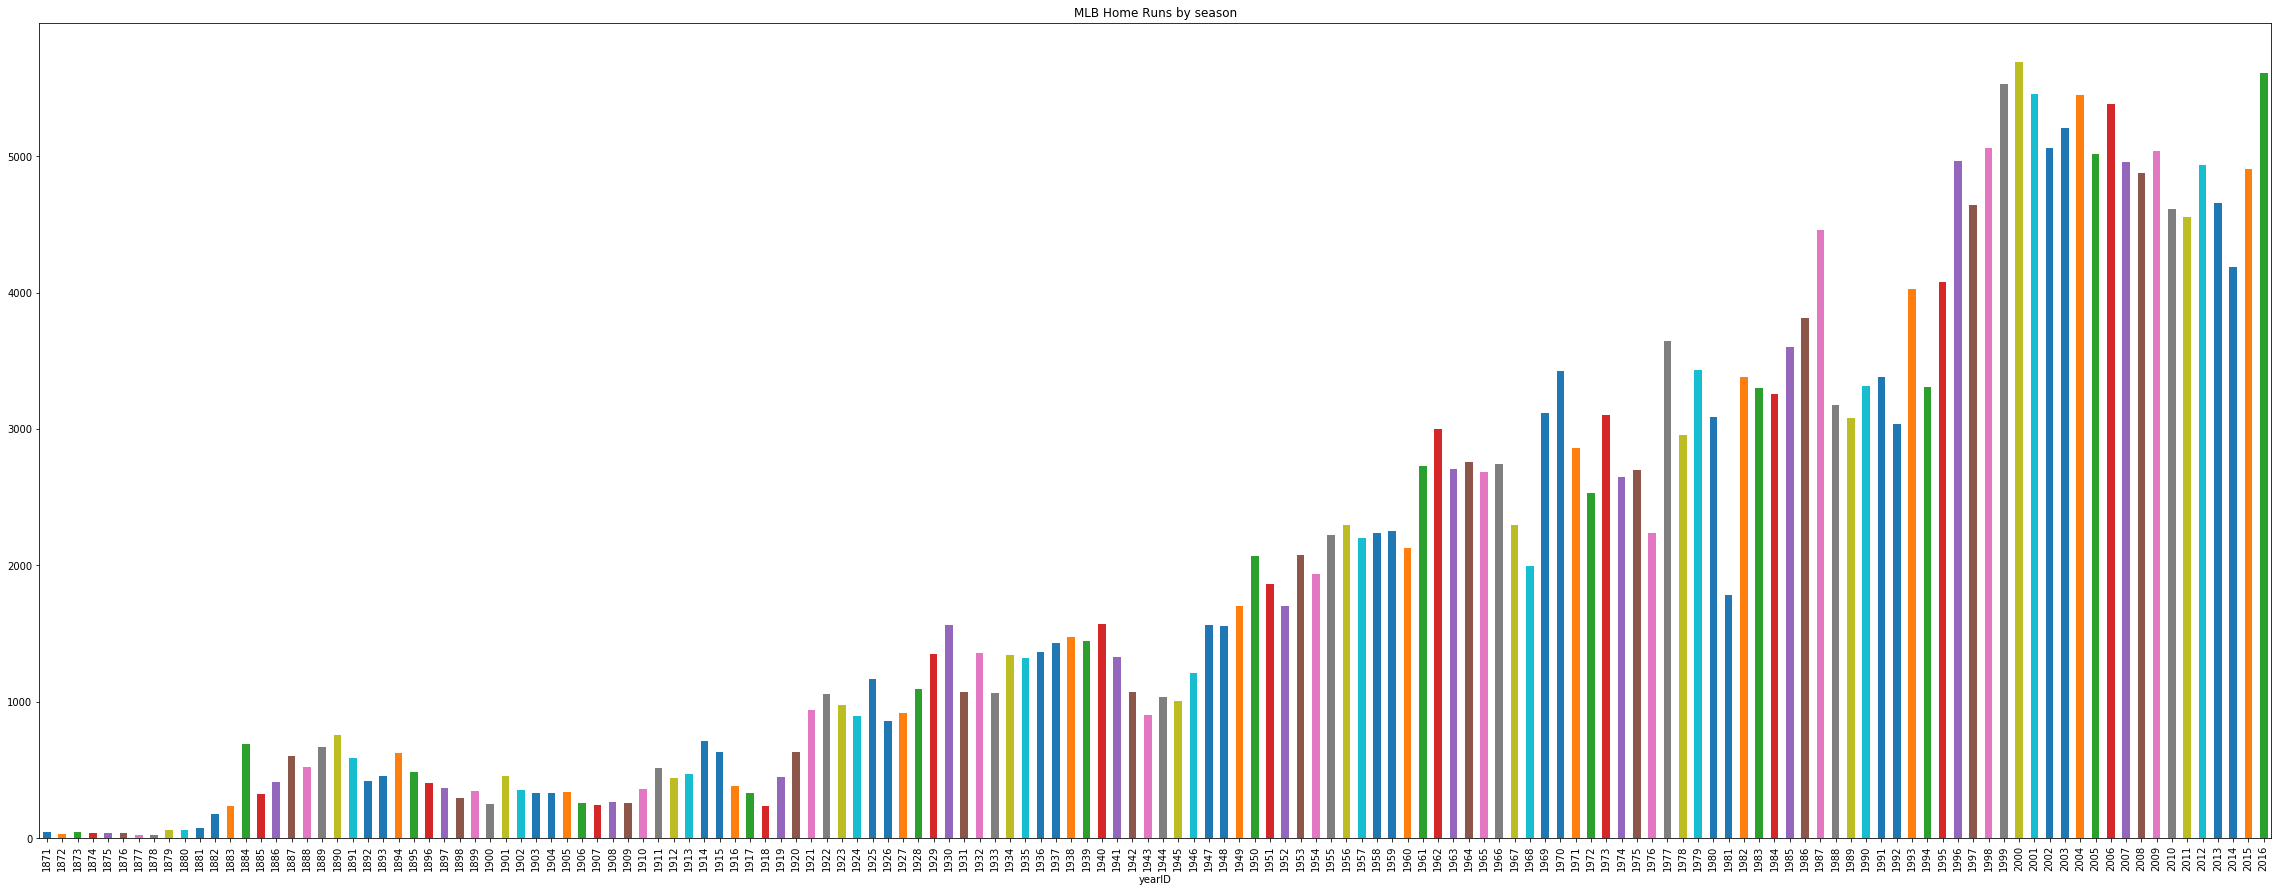

In [69]:
#Graph total HRs per season using bar graph
SeasonTotals = sst.groupby('yearID').sum()
SeasonTotals['HR'].plot(kind='bar', title="MLB Home Runs by season", figsize=(40,15))

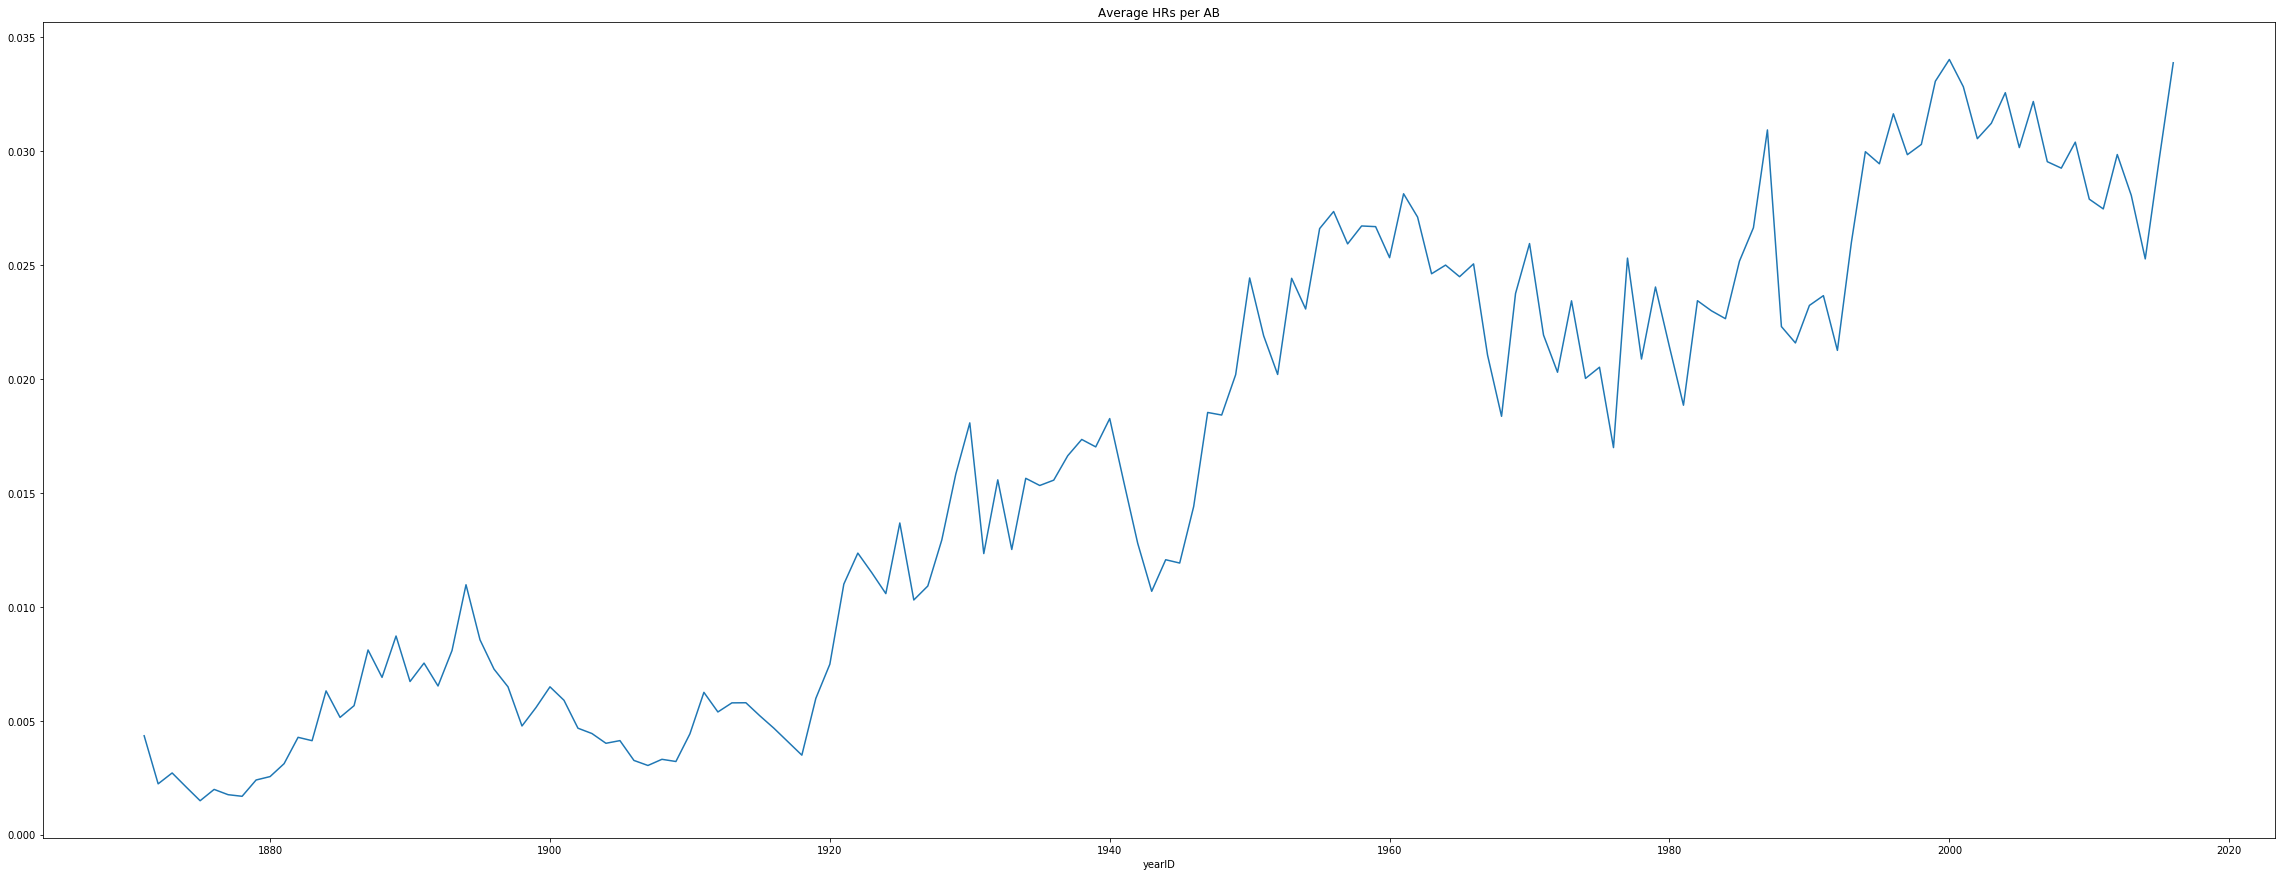

In [72]:
#Using a line graph please graph the average HRs per AB (think about this) per season
SeasonTotals = sst.groupby('yearID').sum()
SeasonTotals['Average HR per AB'] = SeasonTotals['HR'] / SeasonTotals['AB']
SeasonTotals['Average HR per AB'].plot(kind='line', title="Average HRs per AB", figsize=(40,15))